## Exploring IMD data

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy as cp
import warnings
warnings.simplefilter('ignore')

#### Temperature

In [2]:
tmax = xr.open_mfdataset('../data/tmax/netcdf/*.nc')
tmin = xr.open_mfdataset('../data/tmin/netcdf/*.nc')

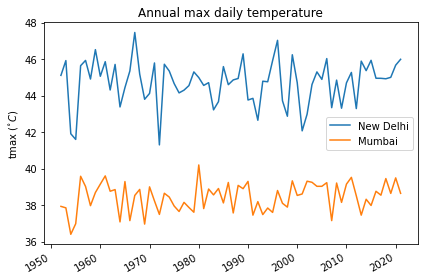

In [3]:
fig, ax = plt.subplots(1,1)

tmax['tmax'].resample(time='1Y').max().sel(lat=28.700, lon=77.100, method='nearest').plot(ax=ax, label='New Delhi')
tmax['tmax'].resample(time='1Y').max().sel(lat=19.076, lon=72.878, method='nearest').plot(ax=ax, label='Mumbai')

plt.title('Annual max daily temperature')
plt.ylabel('tmax ($^{\circ}C$)')
plt.xlabel(None)

plt.legend()
plt.tight_layout()
# plt.savefig('./figures/tmax_ts.png', dpi=300)

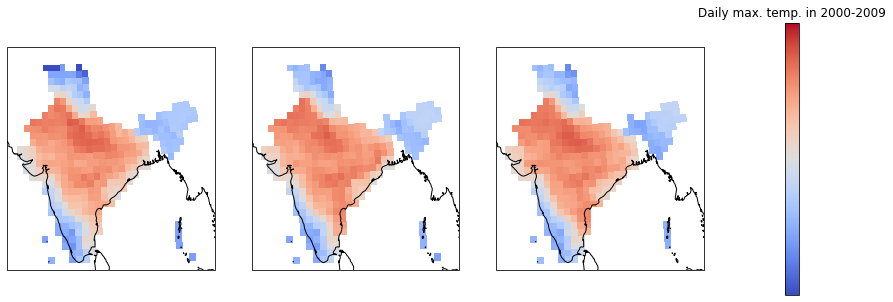

In [7]:
fig, ax = plt.subplots(1,4, figsize=(15,5), gridspec_kw={'hspace':2, 'width_ratios': [2, 2, 2, 1]}, subplot_kw={'projection':ccrs.Orthographic(central_longitude=73, central_latitude=21)})

a = (tmax['tmax'].sel(time=pd.date_range('1951-01-01', '1970-01-01'))
     .max('time').plot(ax=ax[0], vmin=30, vmax=50, add_colorbar=False, cmap='coolwarm', transform=ccrs.PlateCarree())
    )
b = (tmax['tmax'].sel(time=pd.date_range('1971-01-01', '1990-01-01'))
     .max('time').plot(ax=ax[1], vmin=30, vmax=50, add_colorbar=False, cmap='coolwarm', transform=ccrs.PlateCarree())
    )
c = (tmax['tmax'].sel(time=pd.date_range('1991-01-01', '2010-01-01'))
     .max('time').plot(ax=ax[2], vmin=30, vmax=50, add_colorbar=False, cmap='coolwarm', transform=ccrs.PlateCarree())
    )

plt.title('Daily max. temp. in 2000-2009')

ax[0].coastlines()
ax[1].coastlines()
ax[2].coastlines()

# a.colorbar

plt.colorbar(b, cax=ax[3], )
# ax.add_feature(cp.feature.BORDERS)
plt.tight_layout()

# plt.savefig('../tmax_map.png', dpi=300, facecolor='white')

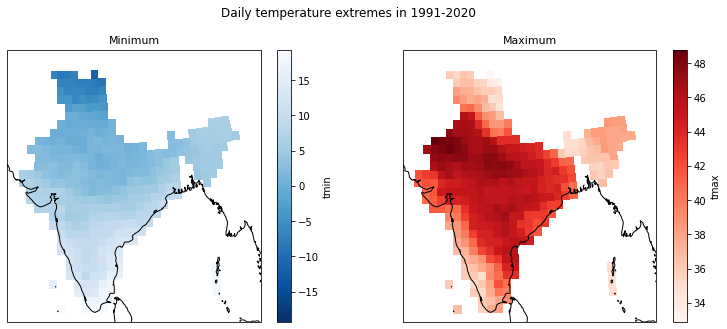

In [195]:
fig, ax = plt.subplots(1,2, figsize=(13,5), gridspec_kw={'hspace':0.1, 'width_ratios': [2,2]}, subplot_kw={'projection':ccrs.Orthographic(central_longitude=73, central_latitude=21)})

a = (tmax['tmax'].sel(time=pd.date_range('1991-01-01', '2020-01-01'))
     .max('time').plot(ax=ax[1], cmap='Reds', transform=ccrs.PlateCarree())
    )
b = (tmin['tmin'].sel(time=pd.date_range('1991-01-01', '2020-01-01'))
     .min('time').plot(ax=ax[0], cmap='Blues_r', transform=ccrs.PlateCarree())
    )


ax[0].set_title('Minimum', fontsize=11)
ax[1].set_title('Maximum', fontsize=11)

ax[0].coastlines()
ax[1].coastlines()

plt.suptitle('Daily temperature extremes in 1991-2020', y=1)
# ax.add_feature(cp.feature.BORDERS)
# plt.tight_layout()

plt.savefig('../tmin_tmax_map.png', dpi=300, facecolor='white')

In [166]:
threshold_exceedance = xr.where(tmax>tmax.chunk(dict(time=-1)).quantile(q=0.9, dim='time',).tmax, True, False)['tmax']

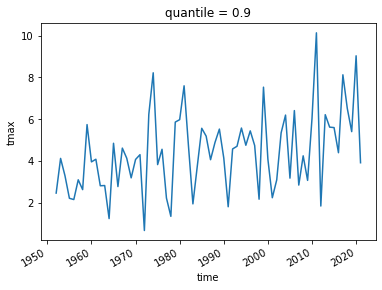

In [167]:
threshold_rolling = threshold_exceedance.rolling(time=7).sum()
xr.where(threshold_rolling>6, True, False).mean(['lat','lon']).resample(time='1Y').sum().plot()

In [180]:
old = threshold_exceedance.sel(time=pd.date_range('1960-01-01', '1990-01-01'))
new = threshold_exceedance.sel(time=pd.date_range('1990-01-01', '2020-01-01'))

In [186]:
old = old.resample(time='1Y').sum().mean('time')
new = new.resample(time='1Y').sum().mean('time')

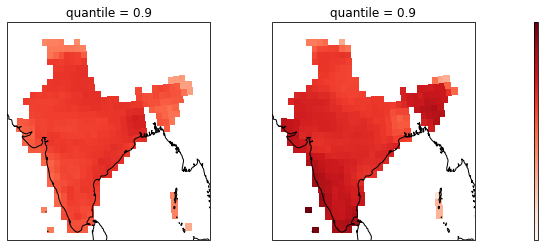

In [190]:
fig, ax = plt.subplots(1,3, figsize=(10,4), 
                       gridspec_kw={'hspace':0.1, 'width_ratios': [8,8,1]}, 
                       subplot_kw={'projection':ccrs.Orthographic(central_longitude=73, central_latitude=21)}
                      )

a = xr.where(old>0, old, np.nan).plot(ax=ax[0], cmap='Reds', vmin=0, vmax=55, add_colorbar=False, transform=ccrs.PlateCarree())
b = xr.where(new>0, new, np.nan).plot(ax=ax[1], cmap='Reds', vmin=0, vmax=55, add_colorbar=False, transform=ccrs.PlateCarree())

ax[0].coastlines()
ax[1].coastlines()

plt.colorbar(a, cax=ax[2])

plt.tight_layout()

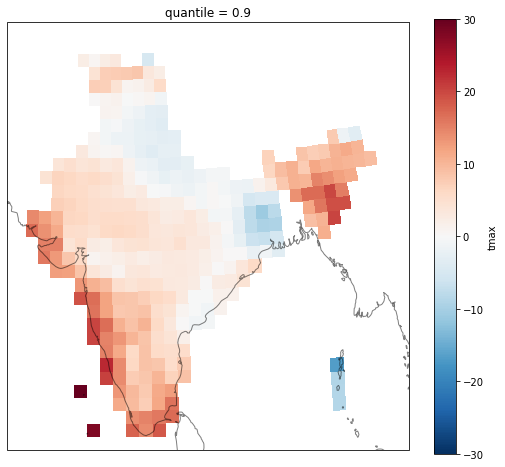

In [191]:
fig, ax = plt.subplots(1,1, figsize=(9,8), subplot_kw={'projection':ccrs.Orthographic(central_longitude=74, central_latitude=21)})
(xr.where(new>0, new, np.nan) - xr.where(old>0, old, np.nan)).plot(ax=ax, transform=ccrs.PlateCarree())

ax.coastlines(alpha=0.5)

#### Rainfall

In [10]:
rain = xr.open_mfdataset('../data/rain/netcdf/*.nc')

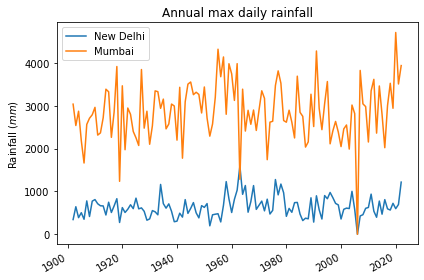

In [15]:
fig, ax = plt.subplots(1,1)

rain['rainfall'].resample(time='1Y').max().sel(lat=28.700, lon=77.100, method='nearest').plot(ax=ax, label='New Delhi')
rain['rainfall'].resample(time='1Y').max().sel(lat=19.076, lon=72.878, method='nearest').plot(ax=ax, label='Mumbai')

plt.title('Annual max daily rainfall')
plt.ylabel('Rainfall ($mm$)')
plt.xlabel(None)

plt.legend()
plt.tight_layout()
# plt.savefig('./figures/rainfall_ts.png', dpi=300)

Text(0.5, 1, 'Daily temperature extremes in 1991-2020')

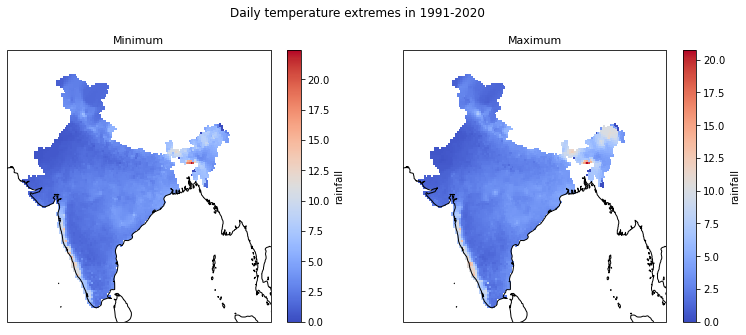

In [13]:
fig, ax = plt.subplots(1,2, figsize=(13,5), gridspec_kw={'hspace':0.1, 'width_ratios': [2,2]}, subplot_kw={'projection':ccrs.Orthographic(central_longitude=73, central_latitude=21)})

a = (rain['rainfall'].sel(time=pd.date_range('1960-01-01', '1990-01-01'))
     .mean('time').plot(ax=ax[1], cmap='coolwarm', transform=ccrs.PlateCarree())
    )
b = (rain['rainfall'].sel(time=pd.date_range('1990-01-01', '2020-01-01'))
     .mean('time').plot(ax=ax[0], cmap='coolwarm', transform=ccrs.PlateCarree())
    )


ax[0].set_title('Minimum', fontsize=11)
ax[1].set_title('Maximum', fontsize=11)

ax[0].coastlines()
ax[1].coastlines()

plt.suptitle('Daily temperature extremes in 1991-2020', y=1)
# ax.add_feature(cp.feature.BORDERS)
# plt.tight_layout()

# plt.savefig('../rain_map.png', dpi=300, facecolor='white')

In [224]:
threshold_exceedance = xr.where(rain>rain.chunk(dict(time=-1)).quantile(q=0.9, dim='time',).rainfall, True, False)['rainfall']

In [225]:
# threshold_rolling = threshold_exceedance.rolling(time=7).sum()
# xr.where(threshold_rolling>6, True, False).mean(['lat','lon']).resample(time='1Y').sum().plot()

In [234]:
old = threshold_exceedance.sel(time=pd.date_range('1960-01-01', '1970-01-01'))
new = threshold_exceedance.sel(time=pd.date_range('2010-01-01', '2020-01-01'))

In [ ]:
%%time 
old = old.resample(time='1Y').sum().mean('time').compute()
new = new.resample(time='1Y').sum().mean('time').compute()

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(10,4), 
                       gridspec_kw={'hspace':0.1, 'width_ratios': [8,8,1]}, 
                       subplot_kw={'projection':ccrs.Orthographic(central_longitude=73, central_latitude=21)}
                      )

a = xr.where(old>0, old, np.nan).plot(ax=ax[0], cmap='Blues', vmin=0, add_colorbar=False, transform=ccrs.PlateCarree())
b = xr.where(new>0, new, np.nan).plot(ax=ax[1], cmap='Blues', vmin=0, add_colorbar=False, transform=ccrs.PlateCarree())

ax[0].coastlines()
ax[1].coastlines()

plt.colorbar(a, cax=ax[2])

plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(9,8), subplot_kw={'projection':ccrs.Orthographic(central_longitude=74, central_latitude=21)})
(xr.where(new>0, new, np.nan) - xr.where(old>0, old, np.nan)).plot(ax=ax, transform=ccrs.PlateCarree())

ax.coastlines(alpha=0.5)